# SQl Connection

In [27]:
from sqlalchemy import create_engine
from credentials import login_details
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
engine = create_engine(f'mysql+pymysql://{login_details["user"]}:{login_details["password"]}@{login_details["host"]}:{login_details["port"]}/{login_details["database"]}')

In [14]:
query = "SELECT * FROM customer"

In [15]:
df = pd.read_sql(query, con=engine)

In [16]:
df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Banking Relationship,Gender,Investment Advisor
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Retail,Male,Victor Dean
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Institutional,Male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Private Bank,Female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Commercial,Male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Retail,Female,Kevin Kim


In [17]:
df.rename(columns = {'ï»¿Client ID':'Client ID'},inplace=True)

# Exploratory Data Analysis

In [18]:
df.shape

(3000, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,51.039667,19.854760,17.00,34.0000,51.000,6.900000e+01,85.00
Location ID,3000.0,21563.323000,12462.273017,12.00,10803.5000,21129.500,3.205450e+04,43369.00
Estimated Income,3000.0,171305.034263,111935.808209,15919.48,82906.5950,142313.480,2.422903e+05,522330.26
Superannuation Savings,3000.0,25531.599673,16259.950770,1482.03,12513.7750,22357.355,3.546474e+04,75963.90
Amount of Credit Cards,3000.0,1.463667,0.676387,1.00,1.0000,1.000,2.000000e+00,3.00
Credit Card Balance,3000.0,3176.206943,2497.094709,1.17,1236.6300,2560.805,4.522632e+03,13991.99
Bank Loans,3000.0,591386.155487,457557.036334,0.00,239628.1375,479793.400,8.258130e+05,2667556.66
Bank Deposits,3000.0,671560.193923,645716.856875,0.00,204400.3750,463316.460,9.427546e+05,3890598.08
Checking Accounts,3000.0,321092.949127,282079.553893,0.00,119947.5300,242815.655,4.348749e+05,1969923.08
Saving Accounts,3000.0,232908.353483,230007.777498,0.00,74794.4050,164086.555,3.155750e+05,1724118.36


In [21]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'Banking Relationship', 'Gender',
       'Investment Advisor'],
      dtype='object')

In [23]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

In [29]:
columns_for_analysis = ['Banking Relationship', 'Gender', "Amount of Credit Cards", "Nationality", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]

### Bivariate Analysis

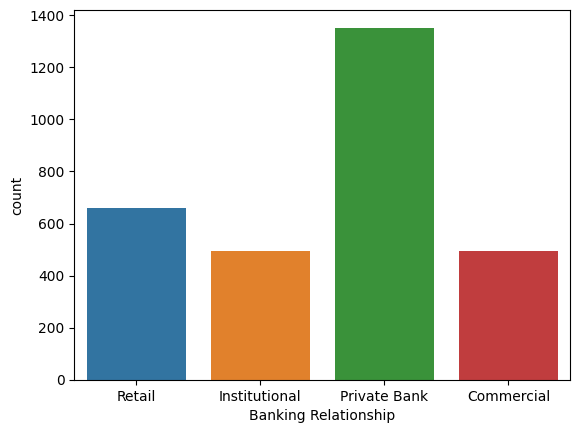

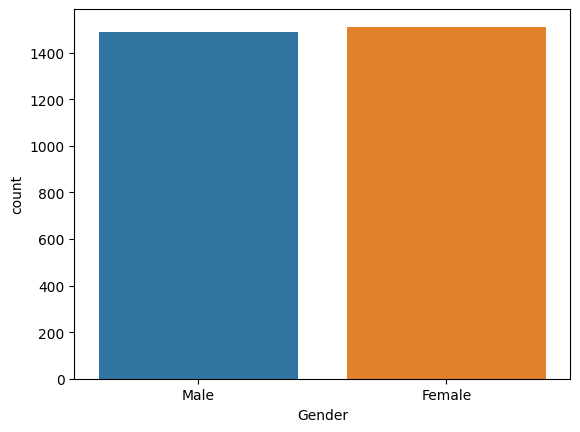

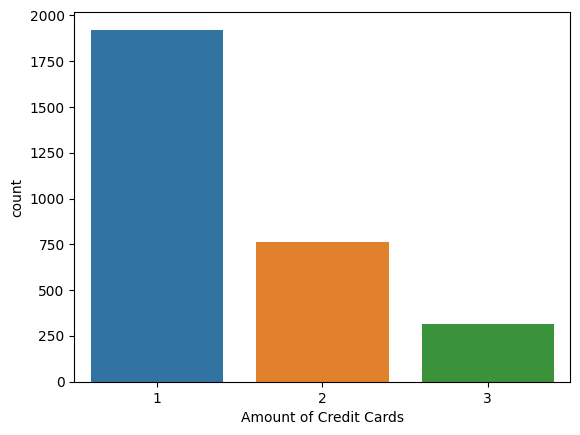

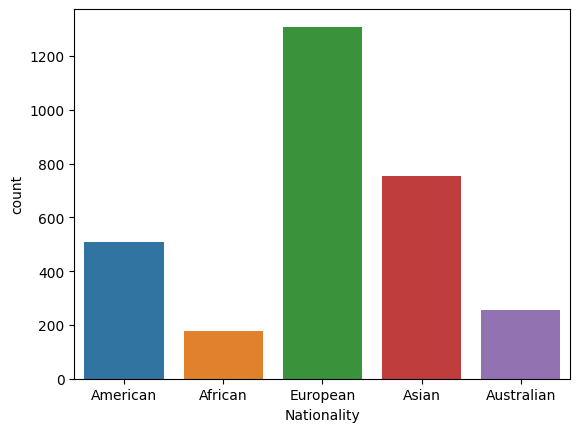

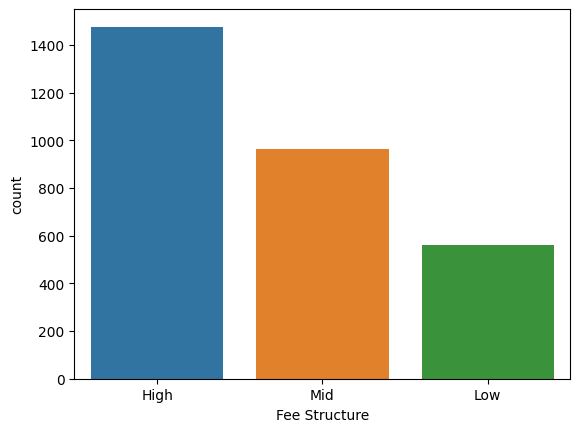

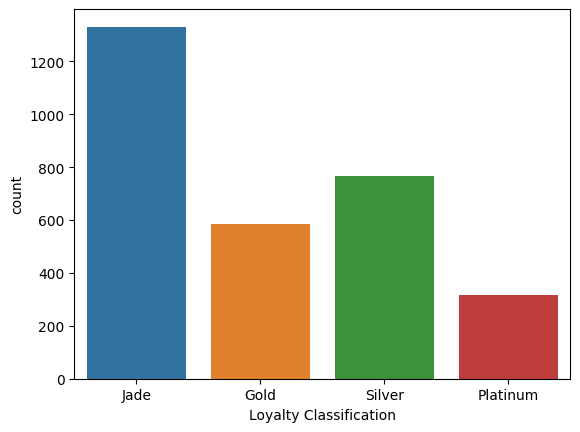

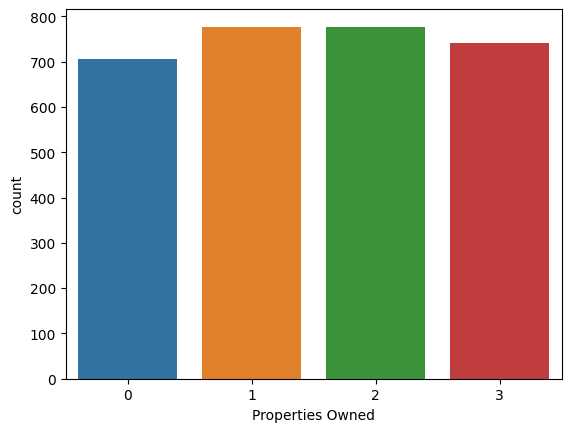

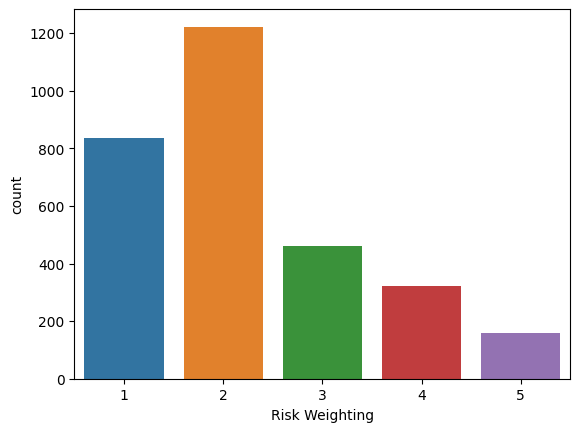

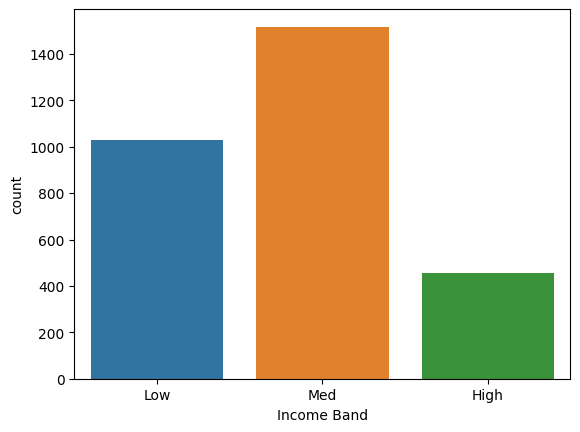

In [30]:
for i, predictor in enumerate(columns_for_analysis):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

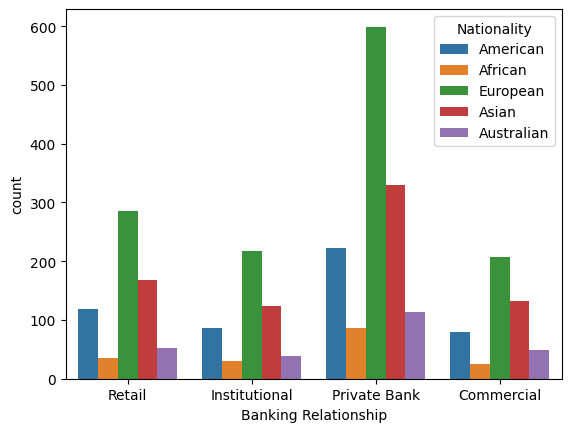

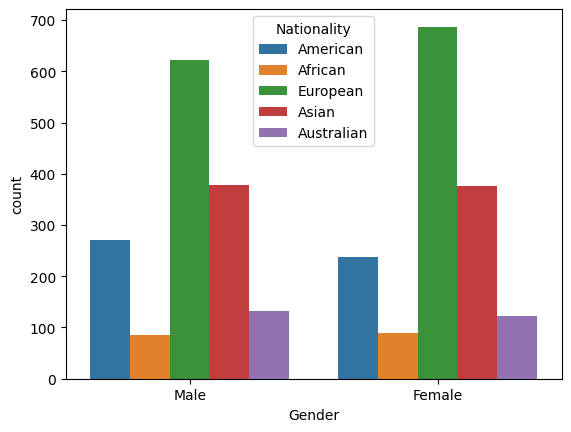

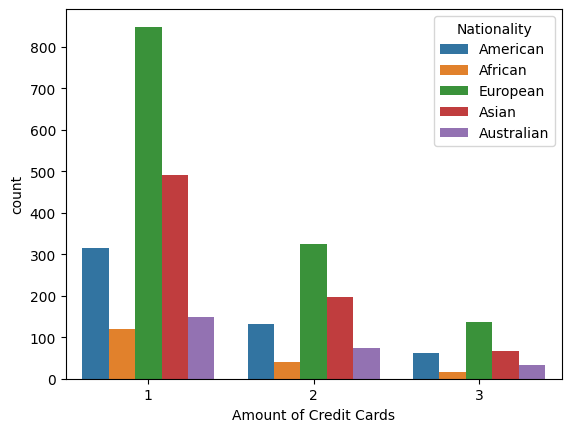

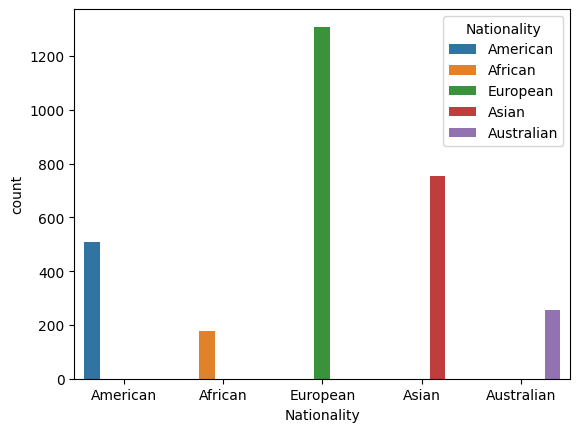

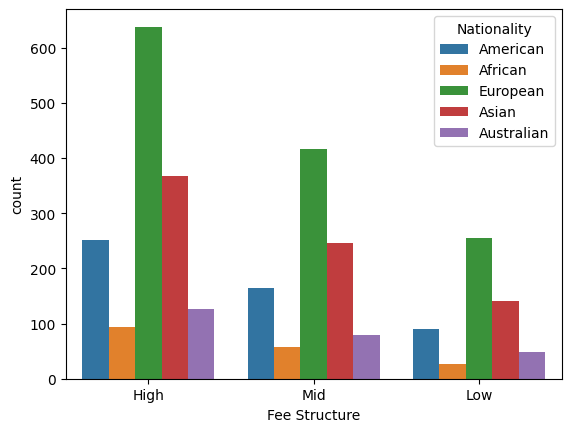

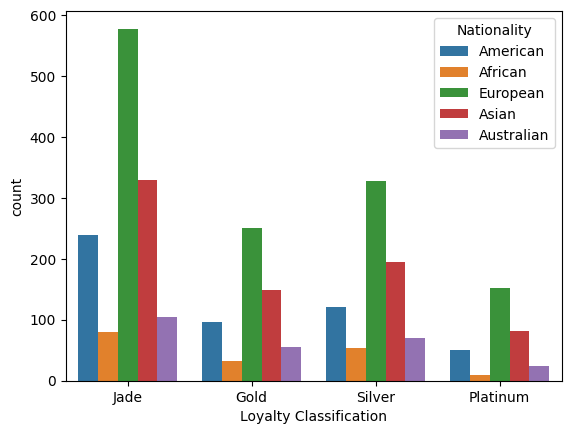

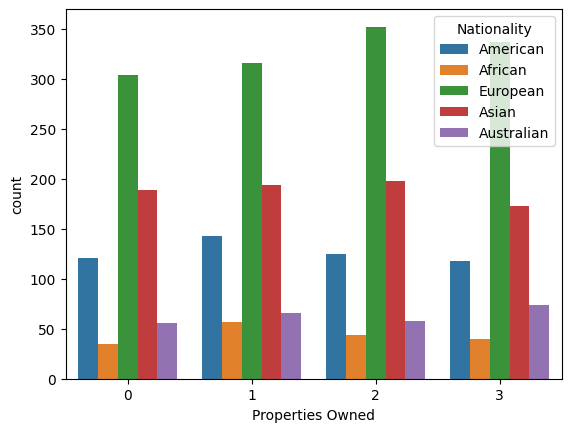

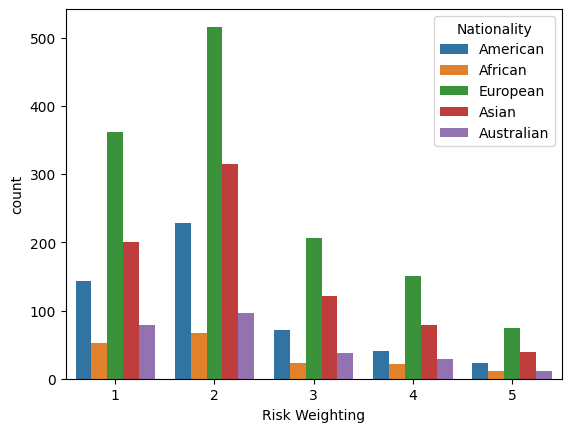

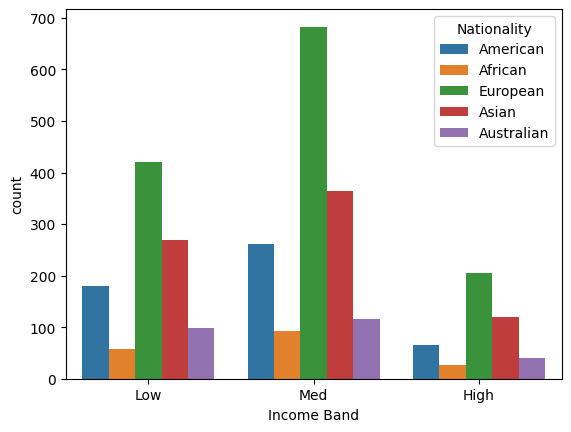

In [31]:
for i, predictor in enumerate(columns_for_analysis):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

## Numerical Analysis

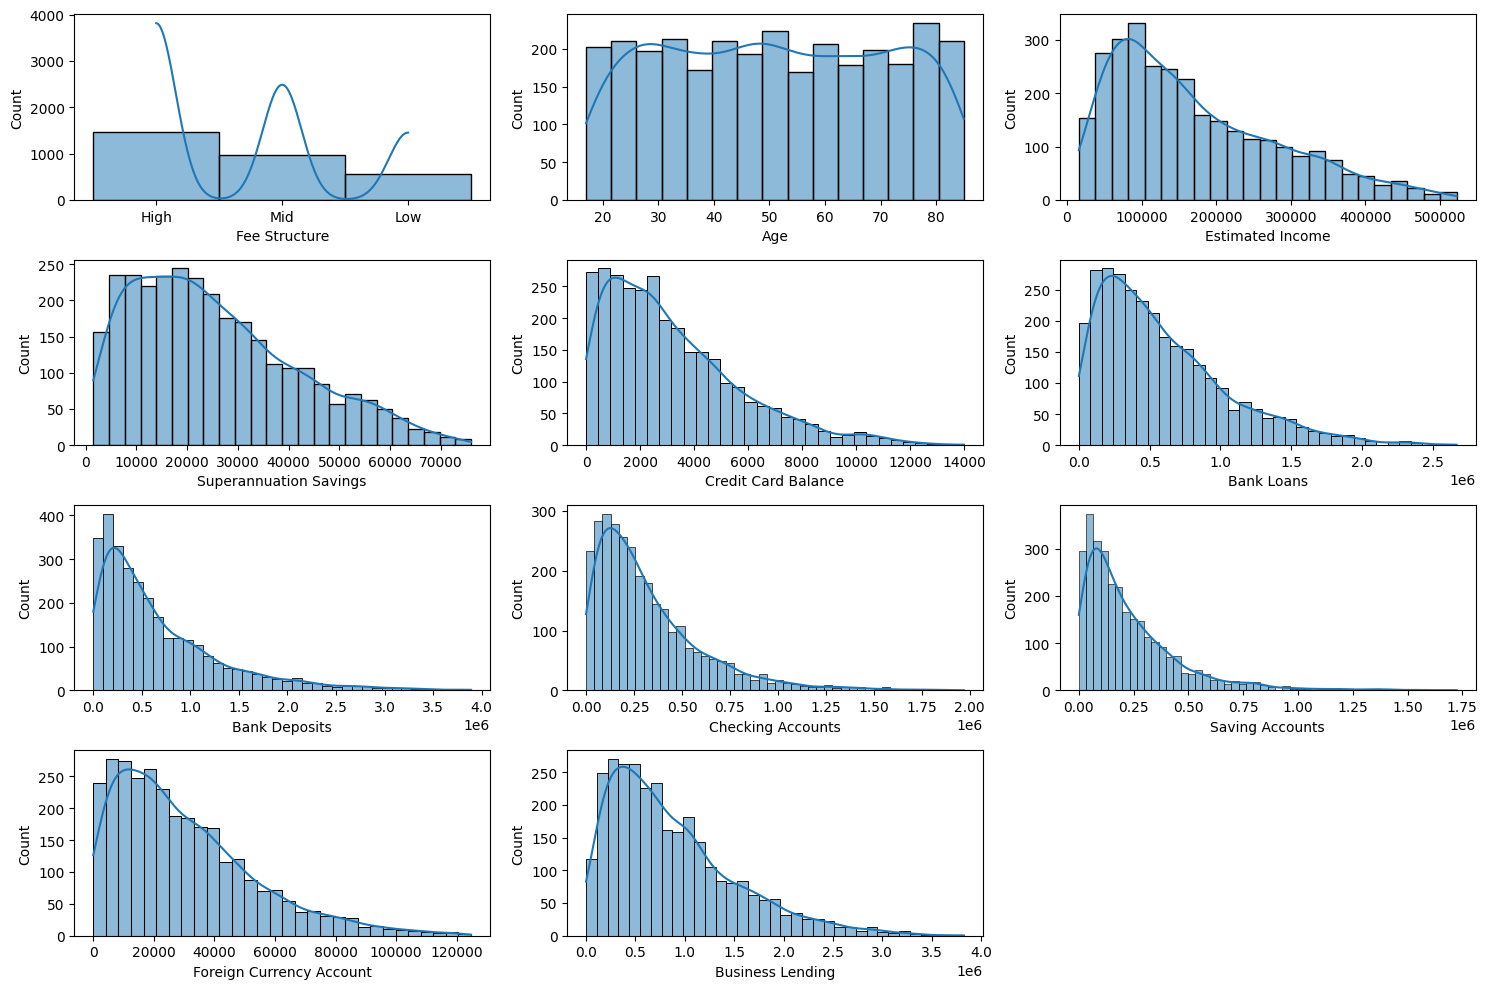

In [32]:
# Numerical analysis and exploration
numerical_cols = ['Fee Structure','Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

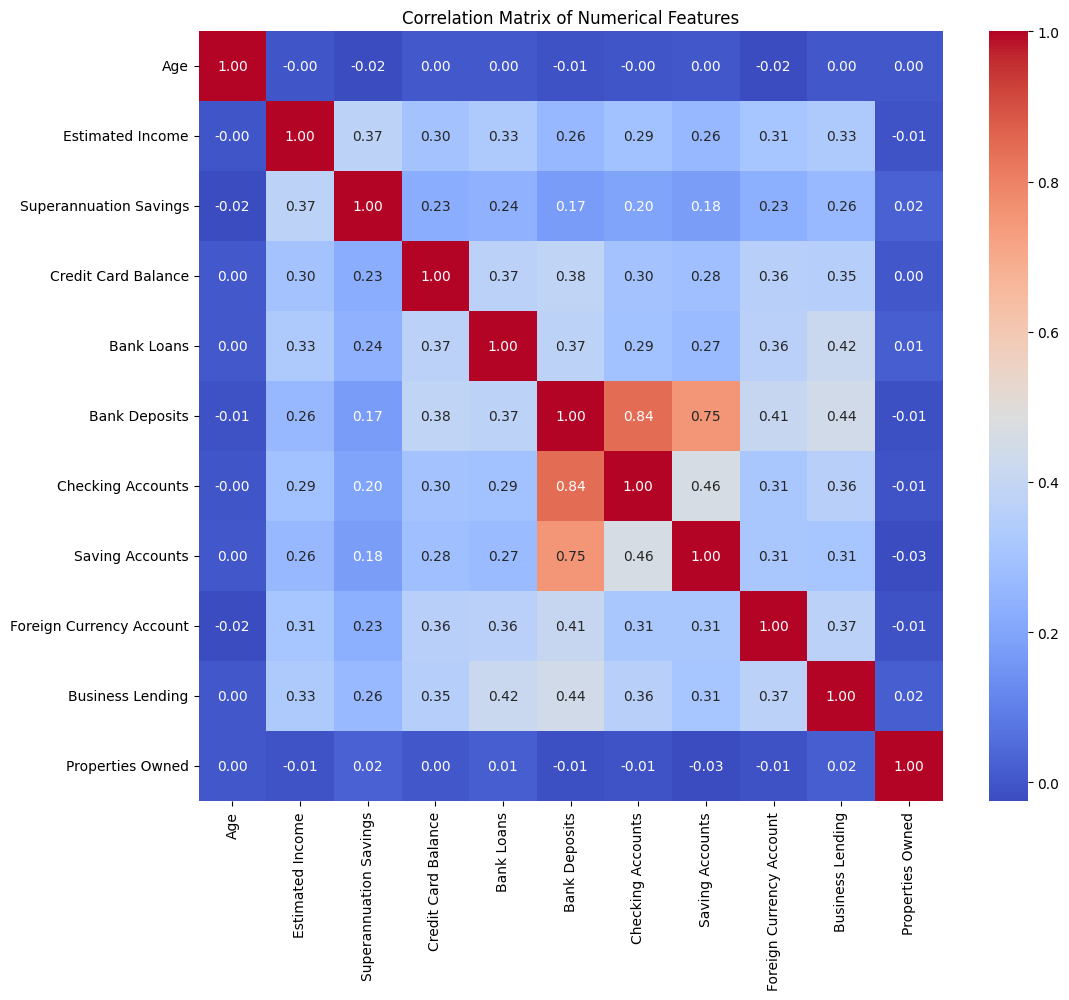

In [33]:
# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance',
                  'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
                  'Foreign Currency Account', 'Business Lending', 'Properties Owned']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

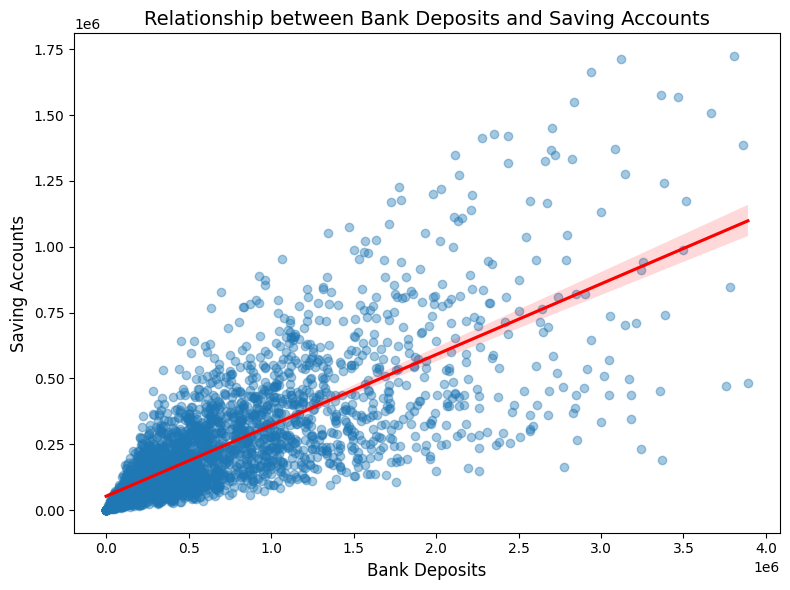

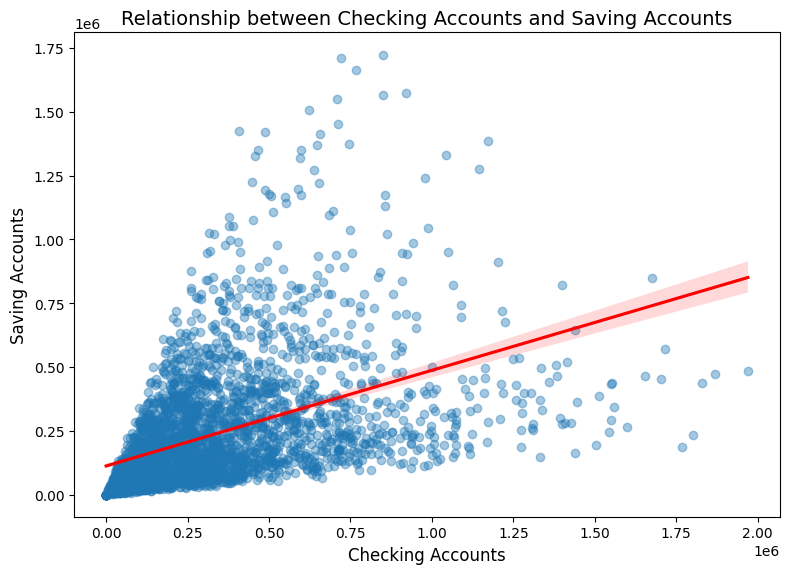

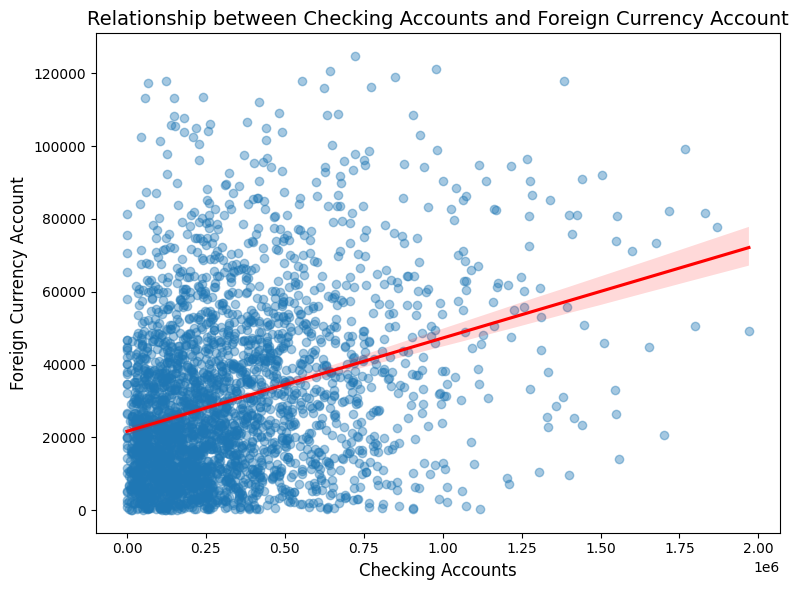

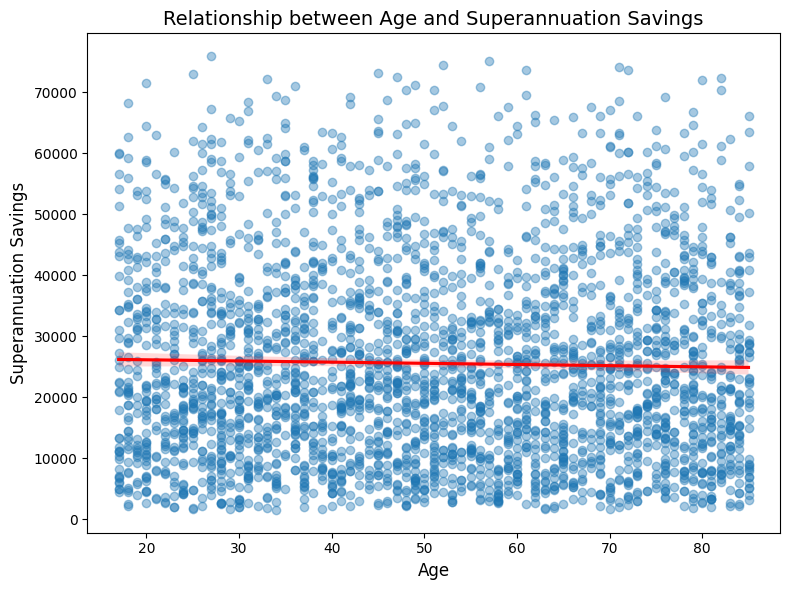

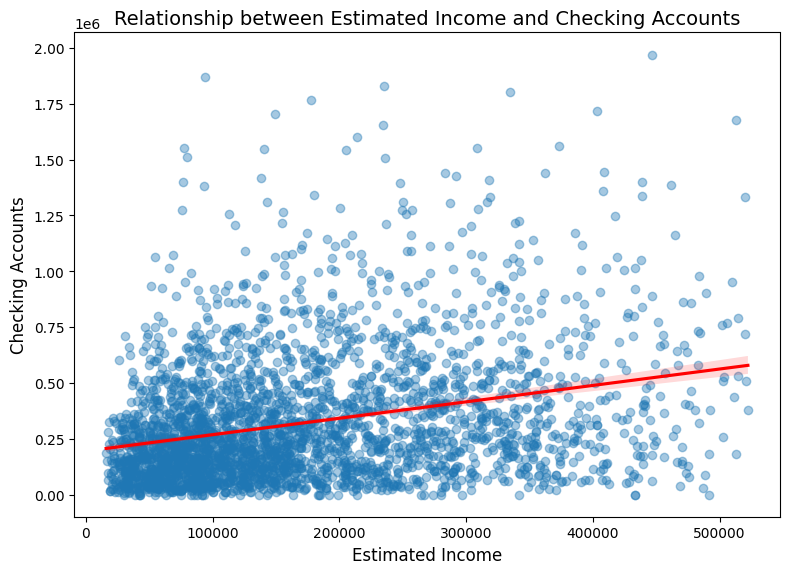

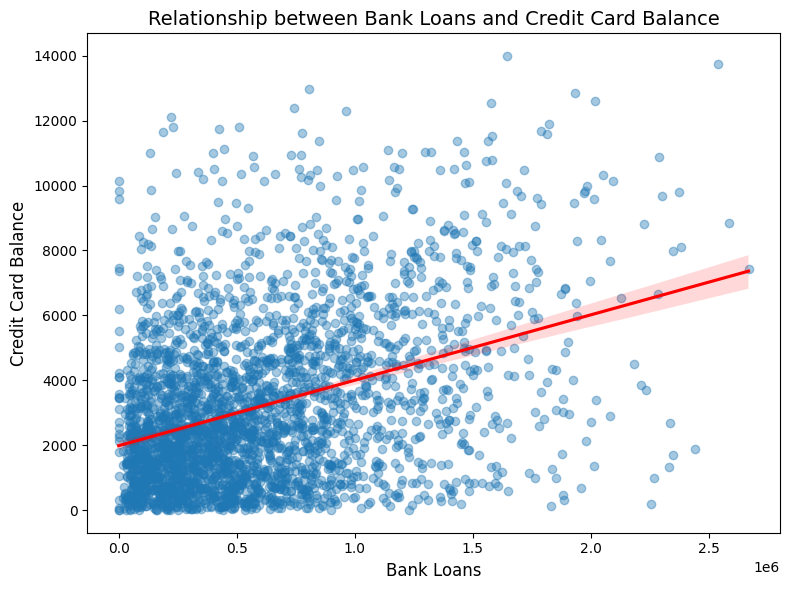

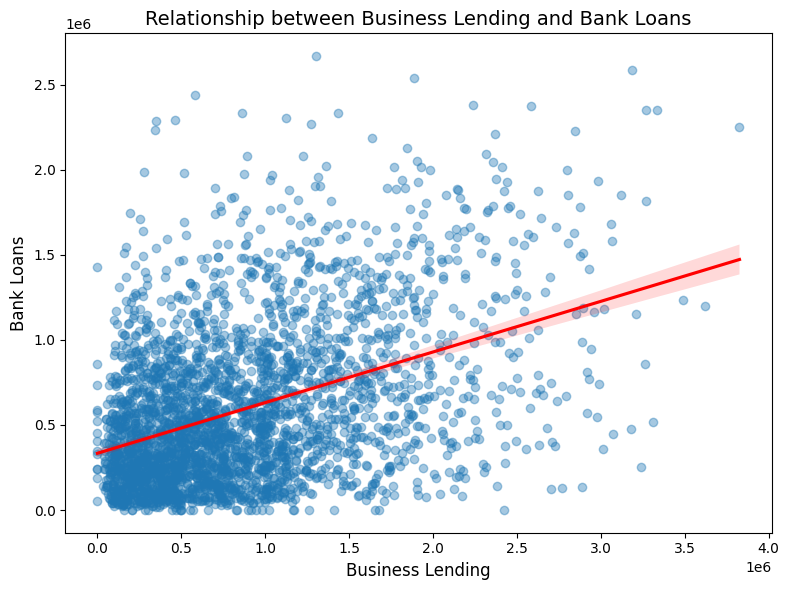

In [34]:
pairs_to_plot = [
    ('Bank Deposits', 'Saving Accounts'),
    ('Checking Accounts', 'Saving Accounts'),
    ('Checking Accounts', 'Foreign Currency Account'),
    ('Age', 'Superannuation Savings'),
    ('Estimated Income', 'Checking Accounts'),
    ('Bank Loans', 'Credit Card Balance'),
    ('Business Lending', 'Bank Loans'),
]


for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},     # semi-transparent points
        line_kws={'color': 'red'}       # best-fit line color
    )
    plt.title(f'Relationship between {x_col} and {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.tight_layout()
    plt.show()